In [1]:
import climate_job_maintenance as cjm

import os 
import numpy as np
'''os.system("jupyter nbconvert --to script 'climate_train.ipynb'")
os.system("jupyter nbconvert --to script 'climate_data.ipynb'")
os.system("jupyter nbconvert --to script 'climate_models.ipynb'")
os.system("jupyter nbconvert --to script 'climate_job_maintenance.ipynb'")
'''

import climate_train as ct
import climate_data
import climate_models
import climate_job_maintenance as cjm





In [2]:
args=ct.options(string_input="-b 3 --depth 1".split())

args.model_id=3
args.model_bank_id="G"

C,names=climate_models.golden_model_bank(args,only_description=True,verbose=True)

depth test 0
	temp
		yes - no - 
	res
		no - yes - 
	geophys
		no - yes - 
	training-depth
		0 - 1 - 2 - 3 - 4 - 5 - 6 - 
	sigma
		4 - 8 - 12 - 16 - 


In [6]:
offset=0
x=[[0],[0,1],[1],np.arange(6).tolist(),np.arange(4).tolist()]
J=cjm.jobnums(C=C,x=x,offset=offset)

In [7]:
print(str(J).replace(' ','')),len(J)

[4,6,12,14,20,22,28,30,36,38,44,46,60,62,68,70,76,78,84,86,92,94,100,102,116,118,124,126,132,134,140,142,148,150,156,158,172,174,180,182,188,190,196,198,204,206,212,214]


(None, 48)

In [5]:
cjm.report_progress(C,x,offset=offset)

Hasnt started:
[]
Hasnt finished:
[]
Nan:
[]
Needs eval:
[]
Done eval:
[4,6,12,14,20,22,28,30,36,38,44,46,60,62,68,70,76,78,84,86,92,94,100,102,116,118,124,126,132,134,140,142,148,150,156,158,172,174,180,182,188,190,196,198,204,206,212,214]
Late eval job:
[]
Needs grad-probe:
[4,6,12,14,20,22,28,30,36,38,44,46,60,62,68,70,76,78,84,86,92,94,100,102,116,118,124,126,132,134,140,142,148,150,156,158,172,174,180,182,188,190,196,198,204,206,212,214]
Done rad-probe:
[]


In [ ]:
'''cjm.configure_models(J)'''

In [8]:
args=ct.options(string_input="-b 3 --depth 1".split())

args.model_id=4
args.model_bank_id="G"

C,names=climate_models.golden_model_bank(args,only_description=True,verbose=True)

depth test 0
	temp
		yes - no - 
	res
		no - yes - 
	geophys
		no - yes - 
	training-depth
		0 - 1 - 2 - 3 - 4 - 5 - 6 - 
	sigma
		4 - 8 - 12 - 16 - 


In [12]:
import torch

In [10]:
net,criterion,(data_init,partition),logs,(PATH0,PATH1,LOG,root)=ct.load_from_save(args)
(training_set,training_generator),(val_set,val_generator),(test_set,test_generator),(dataset,glbl_gen)=ct.load_data(data_init,partition,args)
residue_flag=dataset.outputs[0]=='Su_r'
if residue_flag:
    numoutputs=len(dataset.outputs)
    dataset.outputs+=[ss.replace('_r','') for ss in dataset.outputs]
    dataset.outscales=dataset.outscales*2
if isinstance(net, climate_models.RegressionModel):
    w=linear_model_fit(root)
device=ct.get_device()
net.eval()
if args.co2:
    MSELOC=root+'/MSE-co2.npy'
    SC2LOC=root+'/SC2-co2.npy'
else:
    MSELOC=root+'/MSE.npy'
    SC2LOC=root+'/SC2.npy'

LCNN + 21x21 + deep (5m) + glbl + lat + coarse(4) + batch= 2


/ext3/miniconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


domain id: 3
Loaded the existing model


In [13]:
spread=net.spread
noutsig=net.outwidth



if args.depth:
    MSELOC=MSELOC.replace('.npy','-depth.npy')
    SC2LOC=SC2LOC.replace('.npy','-depth.npy')
    numdepths=len(training_set.depthvals)
else:
    numdepths=1

MSE=torch.zeros(numdepths,noutsig,dataset.dimens[0]-spread*2, dataset.dimens[1]-spread*2)
#LIKE=torch.zeros(noutsig,dataset.dimens[0]-spread*2, dataset.dimens[1]-spread*2)
SC2=torch.zeros(numdepths,noutsig,dataset.dimens[0]-spread*2, dataset.dimens[1]-spread*2)
print(MSELOC)
arr=np.arange(len(dataset))
np.random.shuffle(arr)

/scratch/cg3306/climate/runs/G-4/MSE-depth-depth.npy


In [16]:
depthind=0
training_set.depthind=depthind
insc,outsc=training_set.compute_scales()
insc,outsc=np.reshape(insc,[-1,1,1]),np.reshape(outsc,[-1,1,1])

In [18]:
i=0

In [53]:
uv,Sxy=dataset.input_output(arr[i],scale=False,periodic_lon_expand=True)
uv[:insc.shape[0]]=uv[:insc.shape[0]]/insc
Sxy[:outsc.shape[0]]=Sxy[:outsc.shape[0]]/outsc
uv[uv!=uv]=0
Sxy[Sxy!=Sxy]=0
#

In [54]:
uv.shape,Sxy.shape

(torch.Size([5, 645, 920]), torch.Size([3, 625, 900]))

In [55]:
uv_,Sxy_=dataset.pad_with_zero(uv,0),dataset.pad_with_zero(Sxy,dataset.spread)

In [56]:
uv_.shape

torch.Size([5, 645, 920])

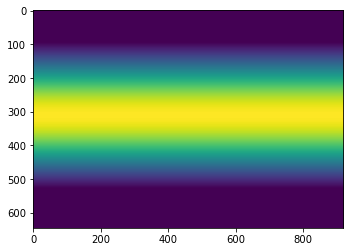

In [60]:
plt.imshow(uv_[4])

In [ ]:
for di in range(len(dataset)*numdepths):
    i=di%len(dataset)
    depthind=di//len(dataset)
    if args.depth:
        dataset.depthind=depthind
        uv,Sxy=dataset.input_output(arr[i],scale=False)
        if i==0:
            training_set.depthind=depthind
            insc,outsc=training_set.compute_scales()
            insc,outsc=np.reshape(insc,[-1,1,1]),np.reshape(outsc,[-1,1,1])
            if residue_flag:
                outsc=np.concatenate([outsc,outsc],axis=0)
        uv[:insc.shape[0]]=uv[:insc.shape[0]]/insc
        Sxy[:outsc.shape[0]]=Sxy[:outsc.shape[0]]/outsc
        uv[uv!=uv]=0
        Sxy[Sxy!=Sxy]=0
        uv,Sxy=dataset.pad_with_zero(uv,0),dataset.pad_with_zero(Sxy,dataset.spread)
    else:
        uv,_,Sxy=dataset[arr[i]]
    if residue_flag:
        Sxy1,Sxy=torch.split(Sxy,[numoutputs,numoutputs],dim=0)
    uv=torch.stack([uv]).to(device)
    #net.set_coarsening(0)
    with torch.set_grad_enabled(False):
        if isinstance(net, climate_models.RegressionModel):
            output=net.forward(uv,w)
        else:
            output=net.forward(uv)
    output=output[0].to(torch.device("cpu"))
    output,prec,_=torch.split(output,[noutsig,net.nprecision,output.shape[0]-noutsig-net.nprecision],dim=0)
    break